<a href="https://colab.research.google.com/github/mcmurphy16/EmoSense/blob/main/Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1 - Importing the file**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The pandas library is used to read .csv file.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/WIDS-23/twitter_data.csv',error_bad_lines=False)
df.head()

<ipython-input-2-1befbfa94962>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/drive/MyDrive/WIDS-23/twitter_data.csv',error_bad_lines=False)
Skipping line 8836: expected 4 fields, saw 5

Skipping line 535882: expected 4 fields, saw 7



,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...


# **Task 2 - Text Pre-Processing**

The first task in NLP is to remove unnecessary data, this process is also called as Text Pre-Processing. Text Pre-Processing involves multiple tasks, such as dropping unnecessary columns, removing stop-words, stemming, lemmatization etc.

We'll begin by dropping unnecessary columns *i.e.* ```ItemID``` and ```SentimentSource``` from the dataframe ```df```.





In [ ]:
df.drop('ItemID', axis=1, inplace=True)
df.drop('SentimentSource', axis=1, inplace=True)

The datframe ```df``` is now been updated, and the columns with index as  ```ItemID``` and ```SentimentSource``` are not removed. The first 5 entries of the dataframe can be viewed by running ```df.head()```.

In [ ]:
df.head()

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...


This task requires vast multitude of libraries, so it's better to import all the necessary libraries at one place. The ```numpy``` library is imported to tackle ```numpy arrays```, which will be used quite frequently in *data pre-processing* or *data cleaning*.

In [ ]:
import numpy as np

The ```re``` and ```nltk``` libraries are used for text filtering, removing stopwords, stemming and lemmatization.

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


The ```wordcloud``` library is used for creating Word Clouds, basically a visual representation to highlight the relative frequency of words occuring in the text. So the word which occurs quite frequently will be highlighted with bigger font-size relative to other words.

```seaborn``` library is used for creating various plots from a dataframe.

```matplotlib``` library is used for creating various plots from arrays.

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Punctuations ```. , ! $( ) * % @``` do not play any major role for this task, so it'll be better to remove them in order to focus on meaningful data.

In [ ]:
corpus = []
for i in range(len(df)):
  review = re.sub('[. , ! $( ) * % @]', ' ',df['SentimentText'][i])
  corpus.append(review)

```corpus``` is a ```list``` of modified sentences. These modified sentences are the entries of ```SentimentText``` from which punctuations ```. , ! $( ) * % @``` are removed.

```URLs``` also do not contribute to the meaning of texts, so they'll also be removed. And the updated sentences after removing punctuations and ```URLs``` will be stored in a ```list``` named ```corpus1```.

In [ ]:
corpus1 = []
for i in range(len(corpus)):
  review = re.sub(r'http\S+', '', corpus[i])
  corpus1.append(review)

Meaning of a word is independent of it's case. So it's better to lower case the capital letters, if any. The lower cased updated sentences are stored in a ```list``` named ```corpus2```. ```corpus2``` contains updated sentences which are formed by removing punctuations, ```URLs```, and lower casing the words.

In [ ]:
corpus2 = []
for i in range(len(corpus1)):
  corpus1[i] = corpus1[i].lower()
  corpus2.append(corpus1[i])

Next step in data pre-processing is tokenization. Tokenization basically converts a sentence into list of words. The main purpose of tokenization is to remove stopwords efficiently, which would have otherwise taken longer duration.

The tokenized words are stored in a ```list``` named ```corpus3```. ```corpus3``` is a ```list``` of ```lists```, where the inner ```list``` contains tokens of words from a sentence.

In [ ]:
corpus3 = []
for i in range(len(corpus2)):
  words = nltk.word_tokenize(corpus2[i])
  corpus3.append(words)

```stopwords``` are special words in a language which does not add a special meaning to a sentence. Some of the stopwords in English language are - *is*, *the*, *our*...etc. ```corpus4``` is a ```list``` of sentences from which ```stopwords```, ```URLs``` and punctuations are removed.

In [ ]:
corpus4 = []
stop_words = stopwords.words('english')
for sentence in corpus3:
  text = ' '.join([word for word in sentence if word not in stop_words])
  corpus4.append(text)

```stemming``` removes the unnecessary part of a word. For eg. *fina* is a stem for *final*, *finally* and *finalized*. Usually ```stemming``` does not give any meaningful word. In order to get a meaningful word, ```lemmatization``` is performed.

The stemmed sentences are stored in a ```list``` named ```corpus5```. And the lemmatized sentences are stored in a ```list``` named ```corpus6```.

*Note* - *lemmatizing* requires longer time as compared to *stemming*.

In [ ]:
corpus5 = [stemmer.stem(word) for word in corpus4]
corpus6 = [lemmatizer.lemmatize(word) for word in corpus4]

In the upcoming parts, majority of the task will be done on the dataframe consisting of stemmed or lemmatized ```SentimentText```. For that reason,  ```SentimentTextStemmed``` is added as a new column index.

In [ ]:
df['SentimentTextStemmed'] = corpus5
df.head()

,Sentiment,SentimentText,SentimentTextStemmed
0,0,is so sad for my APL frie...,sad apl friend
1,0,I missed the New Moon trail...,missed new moon trail
2,1,omg its already 7:30 :O,omg already 7:30 :
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,omgaga im sooo im gunna cry 've dentist since ...
4,0,i think mi bf is cheating on me!!! ...,think mi bf cheating t_t


# **Task 3 - Exploratory Data Analysis**

Exploratory Data Analysis is gaining insights of data from various visual plots. ```seaborn``` library is used to create plots from a ```dataframe```. ```wordcloud``` library is used for creating wordclouds, a visual representation for a data consisting of words which highlights the frequency of words by alloting a larger size to most frequent word.

**Word Cloud of ```SentimentText```**

Text(0.5, 1.0, 'Word Cloud of SentimentText')

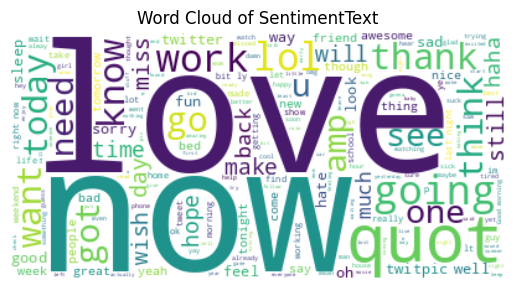

In [ ]:
text = " ".join(review for review in df['SentimentText'])
wordcloud = WordCloud(background_color='white').generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud of SentimentText')

**Word Cloud of ```SentimentText``` with Positive ```Sentiment```**

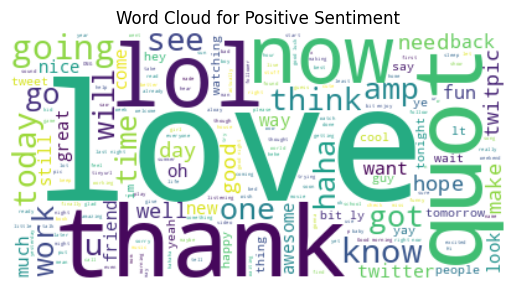

In [ ]:
Sentiment_lst = df.iloc[:,0].values
SentimentText = df.iloc[:,1].values
positive_sentiment = (Sentiment_lst==1)
positive_text = ' '.join(SentimentText[positive_sentiment])
wordcloud1 = WordCloud(background_color='white').generate(positive_text)
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud for Positive Sentiment')
plt.show()

**Word Cloud of ```SentimentText``` with Negative ```Sentiment```**

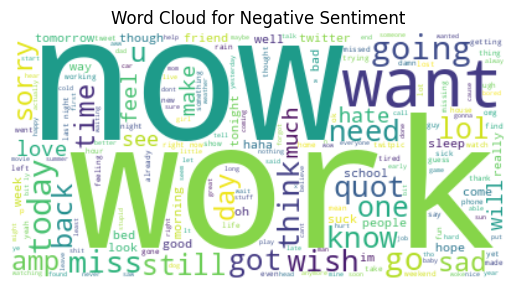

In [ ]:
negative_sentiment = (Sentiment_lst==0)
negative_text = ' '.join(SentimentText[negative_sentiment])
wordcloud2 = WordCloud(background_color='white').generate(negative_text)
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud for Negative Sentiment')
plt.show()

**Word Count Plot**

<Axes: xlabel='Sentiment', ylabel='WordCount'>

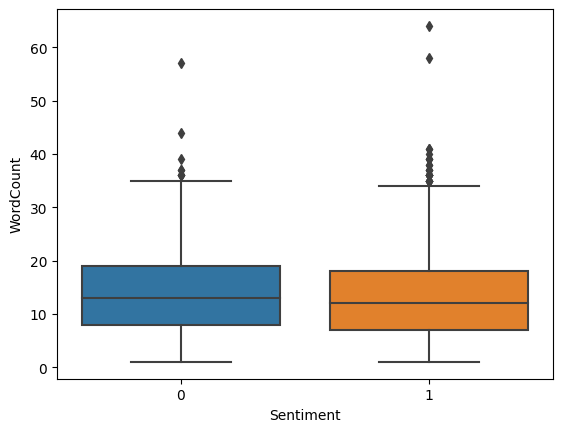

In [ ]:
word_count = []
for tweet in SentimentText:
  word_count.append(len(tweet.split()))
df['WordCount'] = word_count
sns.boxplot( x = 'Sentiment', y = 'WordCount', data = df)

From the above plot we can see that the ```max WordCount``` for a negative tweet is ~58 words, and for a positive tweet is ~64 words.

In order to check that, we find the maximum element from the word count of positive tweet as well as maximum element from the word count of negative tweet.

In [ ]:
word_count = np.array(word_count)
long_pos_tweet = max(word_count[positive_sentiment])
long_neg_tweet = max(word_count[negative_sentiment])
print('Maximum words in a positive tweet ' + str(long_pos_tweet))
print('Maximum words in a negative tweet ' + str(long_neg_tweet))

Maximum words in a positive tweet 64
Maximum words in a negative tweet 57


In order to get the entire entry which has maximum words in apositivie/negative tweet, the code given below is used.

In [ ]:
#for positive tweet
df[df['WordCount']==df['WordCount'][df.Sentiment==1].max()]

In [ ]:
#for negative tweet
df[df['WordCount']==df['WordCount'][df.Sentiment==0].max()]

**Tweet Count Plot**

<Axes: xlabel='Sentiment', ylabel='count'>

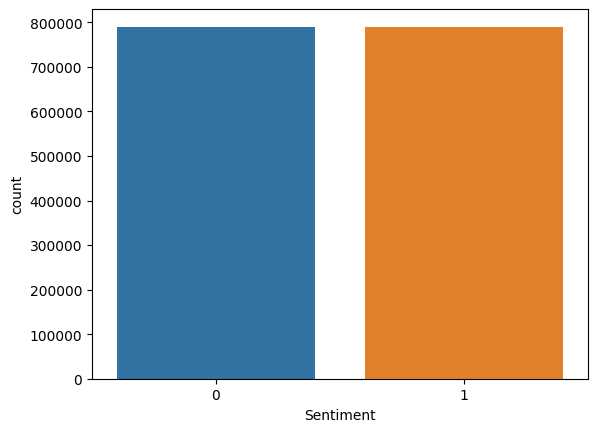

In [ ]:
sns.countplot(x = 'Sentiment', data = df)